In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
attributes = ['danceability', 'tempo', 'energy', 'valence', 'loudness']
train_df = pd.read_csv('is_this_sad.csv', index_col ='uri', header=0)

In [3]:
sad_song_df = train_df.loc[train_df['is_sad'] == 1]
happy_song_df = train_df.loc[train_df['is_sad'] == 0]

In [4]:
sad_song_features = [] 
happy_song_features = [] 
for i, rows in sad_song_df.iterrows():
    sad_song_features.append([rows.danceability, rows.tempo, rows.energy, rows.valence, rows.loudness])
    
for i, rows in happy_song_df.iterrows():
    happy_song_features.append([rows.danceability, rows.tempo, rows.energy, rows.valence, rows.loudness])

sad_song_features = np.array(sad_song_features)
happy_song_features = np.array(happy_song_features)

danceability
sad : 0.5505333333333334,0.010264448888888889, happy: 0.6908333333333333,0.014790072222222225
tempo
sad : 106.80653333333333,841.5522240488889, happy: 110.07853333333334,215.35830518222218
energy
sad : 0.3555833333333333,0.025928368055555557, happy: 0.7319666666666667,0.011500432222222221
valence
sad : 0.3515166666666666,0.03640798605555555, happy: 0.563,0.03328640000000001
loudness
sad : -9.021066666666666,9.530852395555552, happy: -5.293666666666668,1.9546357555555558


/Users/kyungyunlee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


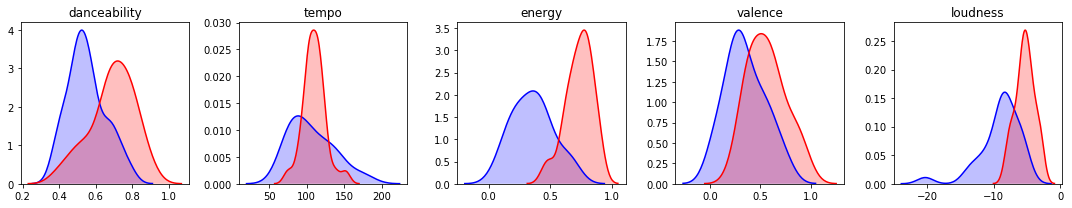

In [9]:
n_bins = 10
fig, axs = plt.subplots(1, len(attributes), figsize=(15, 3), sharey=False ,tight_layout=True)

for i, att in enumerate(attributes) : 
    sad_mean = np.mean(sad_song_features[:, i])
    sad_var = np.var(sad_song_features[:, i])
    happy_mean = np.mean(happy_song_features[:, i])
    happy_var = np.var(happy_song_features[:, i])
    print (att)
    print ("sad : {},{}, happy: {},{}".format(sad_mean, sad_var, happy_mean, happy_var))
    sns.distplot(sad_song_features[:,i], bins=n_bins, hist=False, color="b", kde_kws={"shade": True}, ax=axs[i])
    sns.distplot(happy_song_features[:,i], bins=n_bins, hist=False, color="r", kde_kws={"shade": True}, ax=axs[i])
    axs[i].set_title(att)

plt.savefig('dist.png')